In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

getσₛ (generic function with 1 method)

In [4]:
mat1 = material(1.0^2,1.0)
mat2 = material(epstable("silver"),1.0)

λ = 500:15:900
k₀ = 2π./λ;

In [5]:
w,d = 413.,10.
rc = 2.
Nc,Nw,Nd = 3,10,5
xC = (0,0);

In [6]:
rod = Rod(w,d,rc,Nc,Nw,Nd);

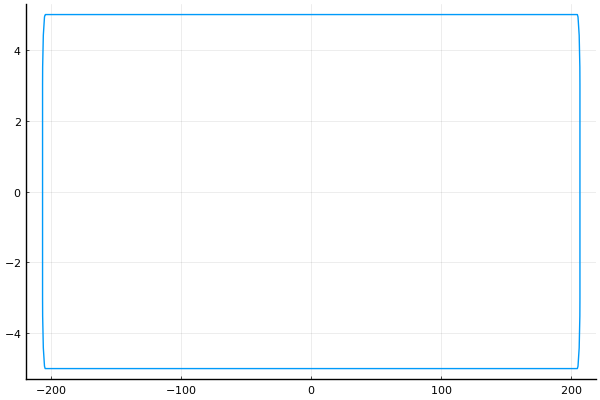

In [7]:
X,Y = getSurfPoints(rod)
plot(X,Y,legend=:none)

In [8]:
u =1
dThr = 100.
m = 2

2

In [9]:
str = rod
rp,sArr = getSvec(m,rod);

In [10]:
i = 1
r = 500.
α = 30.

30.0

In [11]:
σₐArr = getσₐ(m,k₀,mat1,mat2,str,dThr,α);

In [12]:
σₑArr = getσₑ(m,k₀,mat1,mat2,str,dThr,r,α);

In [13]:
σₛArr = getσₛ(m,k₀,mat1,mat2,str,dThr,r,α);

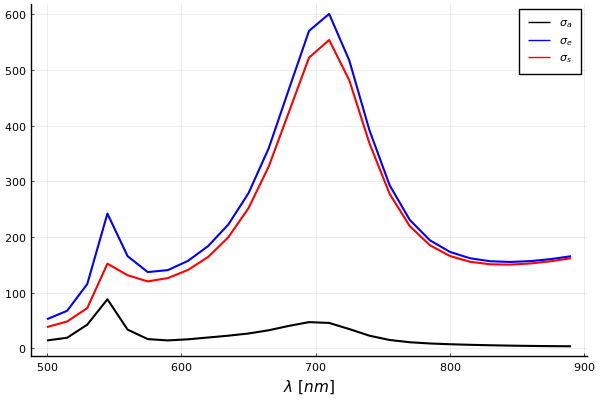

In [14]:
plot(2π./k₀,σₐArr,c=:black,lw=1.5,label=L"σ_a")
plot!(2π./k₀,σₑArr,c=:blue,lw=1.5,label=L"σ_e")
plot!(2π./k₀,σₛArr,c=:red,lw=1.5,label=L"σ_s",xlabel=L"\lambda~[nm]",)